## 5 Results and investment strategies on real data
### 5.1 Model selection

In [1]:
import os
path = os.getcwd() + '/results/'
path_data = os.getcwd() + '/data/'

os.chdir('../')
from inference_mahmm import *

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

palette = sns.color_palette("tab10", 10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Data recuperation

In [2]:
date_start, date_is_oos = '01/01/1990', '31/12/1999'

valeur, code = 'S&P 500', 'SP500'
DATA = data(code, date_start, date_is_oos, 0, path_data + 'data_sp500.csv')

##### Computation

In [4]:
"""def compute_sds(r):
    kde = gaussian_kde(r)
    range_values = np.linspace(min(r), max(r), 1000)
    estimated_density = kde.evaluate(range_values)
    max_density_index = np.argmax(estimated_density)
    estimated_mode = range_values[max_density_index]
    return estimated_mode
    
K = [2, 3]
L = [0, 2, 5, 8, 10]

eoy_oos = DATA.eoy[DATA.eoy >= datetime.strptime(date_is_oos, '%d/%m/%Y')]
eoy_oos = np.append(eoy_oos, DATA.date[len(DATA.date)-1])

df_merged = pd.DataFrame(columns=['year', 'K', 'L', 'di1', 'di2', 'di3', 'duration', 'back_and_forth_rate'])


for i, d in enumerate(DATA.eoy[:-1]):
    print(d)
    
    if i == 0:
        log_ret_is = DATA.log_ret[(DATA.date <= DATA.eoy[i])]
        log_ret_oos = DATA.log_ret[(DATA.date > DATA.eoy[i]) & (DATA.date <= DATA.eoy[i+1])]
        
        #log_ret_is_cash = DATA_cash.log_ret[(DATA_cash.date <= DATA_cash.eoy[i])]
        #log_ret_oos_cash = DATA_cash.log_ret[(DATA_cash.date > DATA_cash.eoy[i]) 
        #                                     & (DATA_cash.date <= DATA_cash.eoy[i+1])]
    else:
        log_ret_is = DATA.log_ret[(DATA.date > DATA.eoy[i-1]) & (DATA.date <= DATA.eoy[i])]
        log_ret_oos = DATA.log_ret[(DATA.date > DATA.eoy[i]) & (DATA.date <= DATA.eoy[i+1])]
        
        #log_ret_is_cash = DATA_cash.log_ret[(DATA_cash.date > DATA_cash.eoy[i-1]) 
        #                                    & (DATA_cash.date <= DATA_cash.eoy[i])]
        #log_ret_oos_cash = DATA_cash.log_ret[(DATA_cash.date > DATA_cash.eoy[i]) 
        #                                     & (DATA_cash.date <= DATA_cash.eoy[i+1])]

    log_ret = np.append(log_ret_is, log_ret_oos)
    #log_ret_cash = np.append(log_ret_is_cash, log_ret_oos_cash)
    
    for ki in K:
        for l in L:
            g = gibbs(ki, l, len(log_ret_is)/len(log_ret), log_ret)
            g.algorithm_est_ma(1500, 500) 

            ratio_all = np.array([[g.res[k]['Σ'][i]/np.min(np.abs(g.res[k]['M'][i] - np.delete(g.res[k]['M'], i))) for k in g.res.keys()] for i in range(ki)])

            sds = np.zeros(ki)
            for ri, r in enumerate(ratio_all):
                sds[ri] = compute_sds(r)
            
            x_all = np.array([g.res[k]['x_oos'] for k in g.res.keys()])
            x = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=x_all.astype(int))
            
            if ki == 2:
                df_merged.loc[len(df_merged)] = {'year':d.year,
                              'K': str(ki),
                              'L': str(l),
                              'di1':sds[0],
                              'di2':sds[1],
                              'duration': compute_average_length_states(x),
                              'back_and_forth_rate': compute_back_and_forth_rate_1d(x)}
                
            elif ki==3:
                df_merged.loc[len(df_merged)] = {'year':d.year,
                              'K': str(ki),
                              'L': str(l),
                              'di1':sds[0],
                              'di2':sds[1],
                              'di3':sds[2],
                              'duration': compute_average_length_states(x),
                              'back_and_forth_rate': compute_back_and_forth_rate_1d(x)}
          
df_merged.to_csv(path + 'model_selection.csv')"""
        
df_merged = pd.read_csv(path + 'model_selection.csv', sep=',')
df_merged = df_merged[df_merged['year'] <= 2013]

##### Yearly $\widehat{SDS}$

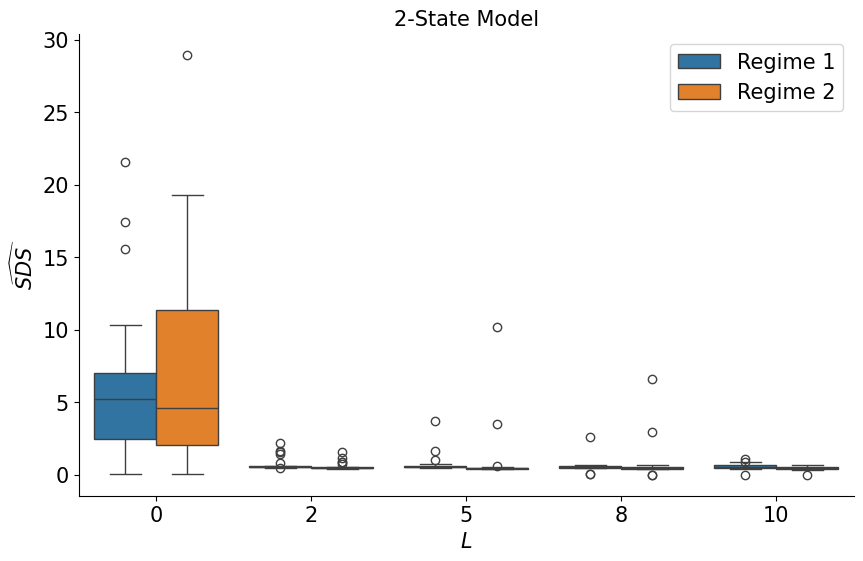

In [5]:
k = 2
    
df_melted = pd.DataFrame({'year':df_merged[df_merged['K'] == k].year,
                          'L': df_merged[df_merged['K'] == k].L,
                          'SDS':'Regime 1',
                          'value':df_merged[df_merged['K'] == k].di1})
    
df_melted = pd.concat([df_melted, pd.DataFrame({'year':df_merged[df_merged['K'] == k].year,
                                                'L': df_merged[df_merged['K'] == k].L,
                                                'SDS':'Regime 2',
                                                'value':df_merged[df_merged['K'] == k].di2})])


fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='value', x='L', hue='SDS', data=df_melted, dodge=True, showfliers=True)
plt.legend(fontsize=15)
gfg.tick_params(labelsize=15)
plt.xlabel("$L$", fontsize=15)
plt.ylabel('$\widehat{SDS}$', fontsize=15)
plt.title(f'{k}-State Model', fontsize=15)
sns.despine()
plt.show()

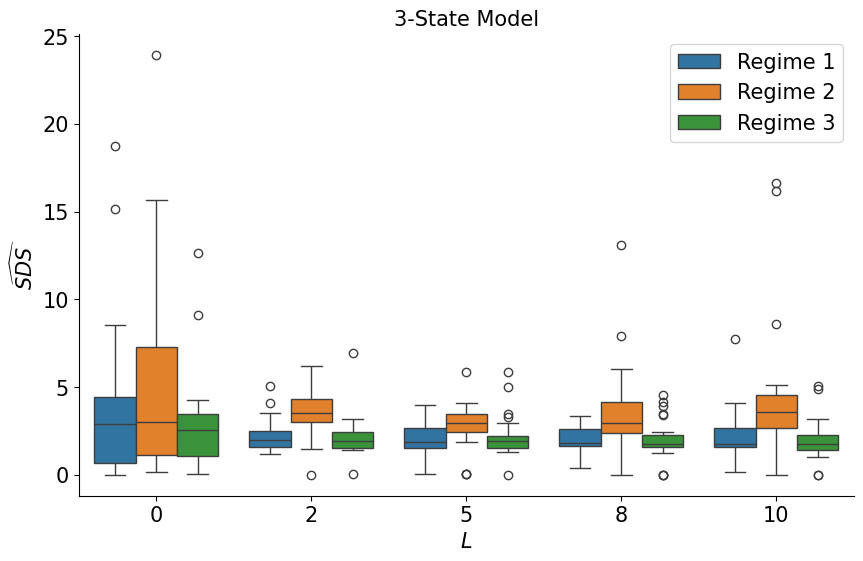

In [6]:
k = 3
    
df_melted = pd.DataFrame({'year':df_merged[df_merged['K'] == k].year,
                          'L': df_merged[df_merged['K'] == k].L,
                          'SDS':'Regime 1',
                          'value':df_merged[df_merged['K'] == k].di1})
    
df_melted = pd.concat([df_melted, pd.DataFrame({'year':df_merged[df_merged['K'] == k].year,
                                                'L': df_merged[df_merged['K'] == k].L,
                                                'SDS':'Regime 2',
                                                'value':df_merged[df_merged['K'] == k].di2})])

df_melted = pd.concat([df_melted, pd.DataFrame({'year':df_merged[df_merged['K'] == 3].year,
                                                'L': df_merged[df_merged['K'] == 3].L,
                                                'SDS':'Regime 3',
                                                'value':df_merged[df_merged['K'] == 3].di3})])

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='value', x='L', hue='SDS', data=df_melted, dodge=True, showfliers=True)
plt.legend(fontsize=15)
gfg.tick_params(labelsize=15)
plt.xlabel("$L$", fontsize=15)
plt.ylabel('$\widehat{SDS}$', fontsize=15)
plt.title(f'{k}-State Model', fontsize=15)
sns.despine()
plt.show()

##### Average state duration

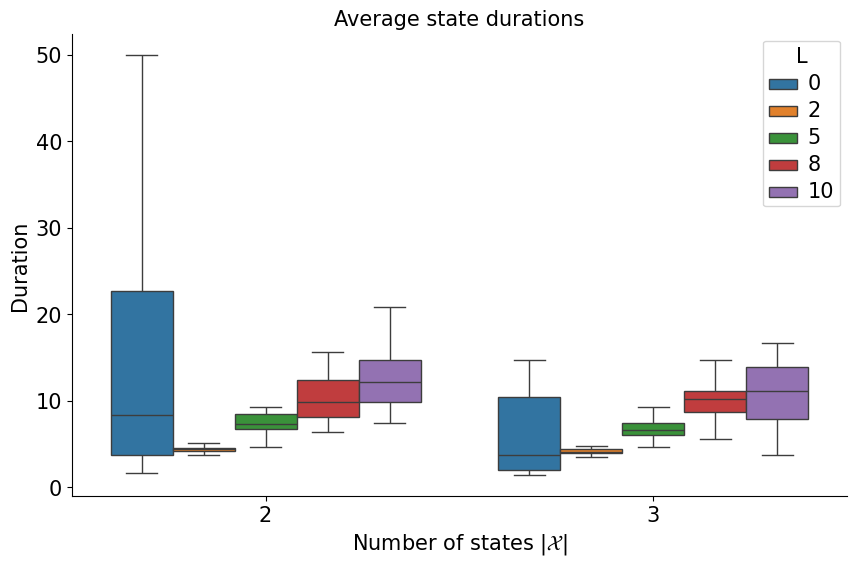

In [7]:
L = [0, 2, 5, 8, 10]
K = [2, 3]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='duration', x='K', hue='L', data=df_merged, dodge=True, palette = palette, showfliers=False)
plt.setp(gfg.get_legend().get_texts(), fontsize='15')  
plt.setp(gfg.get_legend().get_title(), fontsize='15')  
gfg.tick_params(labelsize=15)
    
plt.xlabel("Number of states $|\mathcal{X}|$", fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.title('Average state durations', fontsize=15)
sns.despine()
plt.show()

##### Back-and-forth switching rate

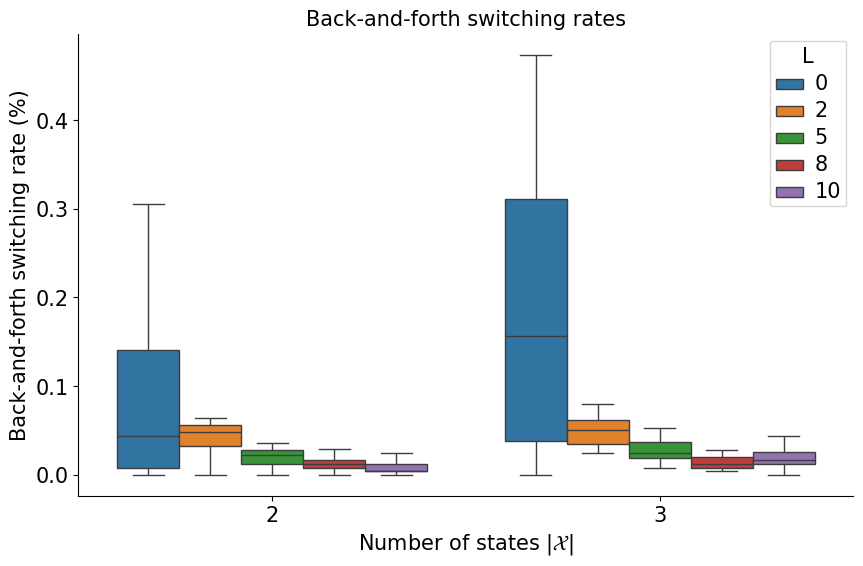

In [8]:
df_merged['back_and_forth_rate'] = df_merged['back_and_forth_rate']

L = [0, 2, 5, 8, 10]
K = [2, 3]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='back_and_forth_rate', x='K', hue='L', data=df_merged, dodge=True, palette = palette, 
                  showfliers=False)

plt.setp(gfg.get_legend().get_texts(), fontsize='15')  
plt.setp(gfg.get_legend().get_title(), fontsize='15')  
gfg.tick_params(labelsize=15)

plt.xlabel("Number of states $|\mathcal{X}|$", fontsize=15)
plt.ylabel('Back-and-forth switching rate (%)', fontsize=15)
plt.title('Back-and-forth switching rates', fontsize=15)
sns.despine()
plt.show()